<a href="https://colab.research.google.com/github/alfiethom/Portofolio/blob/main/capstone_project/customer_segmentation_and_marketing_mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset imported in Drive
data_dir = '/content/drive/MyDrive/Master Data Science'
orders = pd.read_excel(data_dir+'/Orders.xlsx')
customers = pd.read_excel(data_dir+'/Customers.xlsx')

# Exploring and Cleaning Data

In [ ]:
#data exploring
orders

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,2021-07-04,20203,32900,IEV,FO112,3.0,6.46
131702,131703,2021-07-04,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,2021-07-04,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,2021-07-04,20203,32900,0H2,ZVTO4,1.0,4.57


In [ ]:
customers

,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,F,48,Spain
1,822,F,39,Germany
2,3686,F,56,Greece
3,3719,F,49,Spain
4,9200,M,18,Italy
...,...,...,...,...
22620,14811,M,32,Germany
22621,3232,F,47,Spain
22622,5751,M,34,Germany
22623,10765,M,29,Germany


# Checking Missing Values

In [ ]:
orders.isnull()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
131701,False,False,False,False,False,False,False,False
131702,False,False,False,False,False,False,False,False
131703,False,False,False,False,False,False,False,False
131704,False,False,False,False,False,False,False,False


In [ ]:
customers.isnull()


,Customer_ID,GENDER,AGE,GEOGRAPHY
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
22620,False,False,False,False
22621,False,False,False,False
22622,False,False,False,False
22623,False,False,False,False


In [ ]:
duplicated_counts = orders.duplicated(keep=False).value_counts()
print(duplicated_counts)


False    131706
dtype: int64


In [ ]:
orders.head()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [ ]:
customers.head()

,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,F,48,Spain
1,822,F,39,Germany
2,3686,F,56,Greece
3,3719,F,49,Spain
4,9200,M,18,Italy


In [ ]:
customers.describe()

,Customer_ID,AGE
count,22625.000000,22625.000000
mean,11313.000000,37.919646
std,6531.419256,12.226050
min,1.000000,18.000000
25%,5657.000000,29.000000
50%,11313.000000,38.000000
75%,16969.000000,46.000000
max,22625.000000,75.000000


In [ ]:
orders.describe()


,id,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485318,11.981524
std,38020.391614,6086.447552,18709.901238,3.872666,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [ ]:
#count customers by Location

customers.GEOGRAPHY.value_counts()

Germany        7970
Italy          4480
France         2644
Greece         2269
UK             2264
Spain          1651
Netherlands    1347
Name: GEOGRAPHY, dtype: int64

In [ ]:
#count of customer gender

In [ ]:
customers.GENDER.value_counts()

F    11328
M    11297
Name: GENDER, dtype: int64

In [ ]:
#quantity order

orders.SKU_Category.value_counts()

N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64

In [ ]:
#merging dataframe
customers_df = pd.merge(customers, orders, on='Customer_ID' , how='left', )
customers_df



,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2547,F,48,Spain,1,2021-01-02,1,X52,0EM7L,1.0,3.13
1,2547,F,48,Spain,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69
2,2547,F,48,Spain,7800,2021-01-25,3743,X52,885U7,1.0,4.95
3,2547,F,48,Spain,7801,2021-01-25,3743,29A,A59HR,3.0,6.24
4,2547,F,48,Spain,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75
...,...,...,...,...,...,...,...,...,...,...,...
131701,5751,M,34,Germany,131653,2021-07-04,32874,LSD,NSGRM,1.0,11.02
131702,5751,M,34,Germany,131654,2021-07-04,32874,0H2,9Q5PZ,1.0,7.85
131703,5751,M,34,Germany,131655,2021-07-04,32874,D6J,52BYA,1.0,40.72
131704,10765,M,29,Germany,131666,2021-07-04,32881,Z4O,6IISH,1.0,1.19


In [ ]:
print(customers_df.isna().sum())


Customer_ID       0
GENDER            0
AGE               0
GEOGRAPHY         0
id                0
Date              0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64


In [ ]:
#calculate revenue by age
Total_revenue = customers_df.groupby('AGE')['Sales_Amount'].sum()

In [ ]:
#define labels and bins

age_bins = [18,25,30,35,40,45,50,55,60,65,70,80]
age_label=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70+"]

customers_df['AgeBin'] = pd.cut(customers_df['AGE'], bins=age_bins, labels=age_label)

In [ ]:
customers_df.head(5)

,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,AgeBin
0,2547,F,48,Spain,1,2021-01-02,1,X52,0EM7L,1.0,3.13,45-49
1,2547,F,48,Spain,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69,45-49
2,2547,F,48,Spain,7800,2021-01-25,3743,X52,885U7,1.0,4.95,45-49
3,2547,F,48,Spain,7801,2021-01-25,3743,29A,A59HR,3.0,6.24,45-49
4,2547,F,48,Spain,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75,45-49


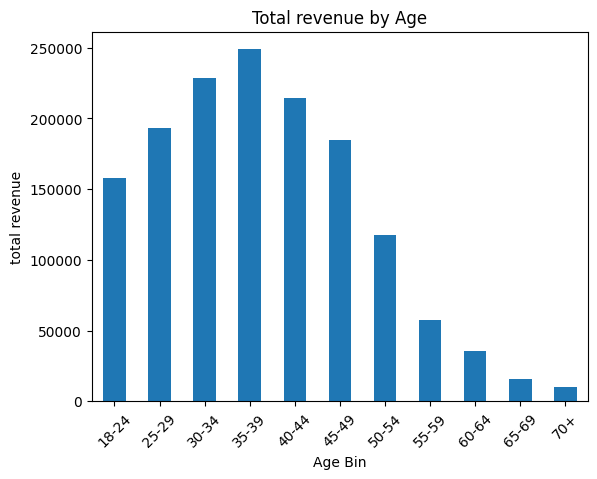

In [ ]:
customers_df[["AgeBin","Sales_Amount"]].groupby("AgeBin").sum().reset_index().plot(x="AgeBin", y="Sales_Amount",kind="bar",legend=False)
plt.xlabel('Age Bin')
plt.ylabel('total revenue')
plt.title('Total revenue by Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

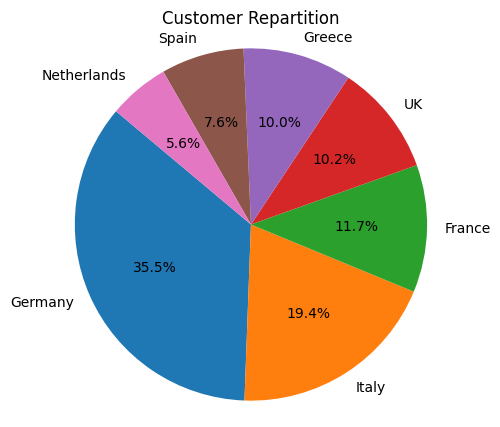

In [ ]:
#customer repartition

customer_counts = customers_df['GEOGRAPHY'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Repartition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()







<Figure size 1000x600 with 0 Axes>

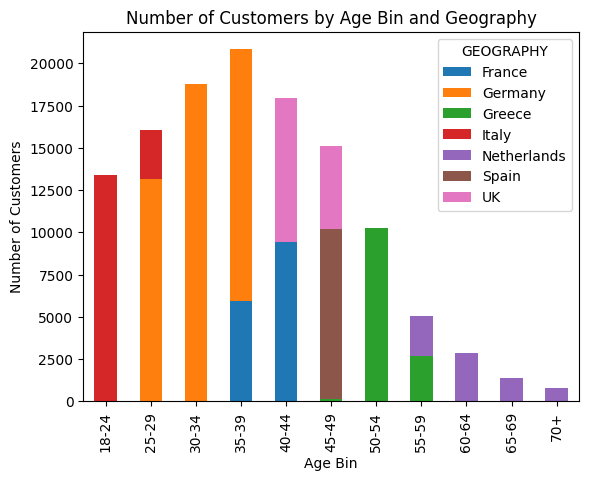

<Figure size 1000x600 with 0 Axes>

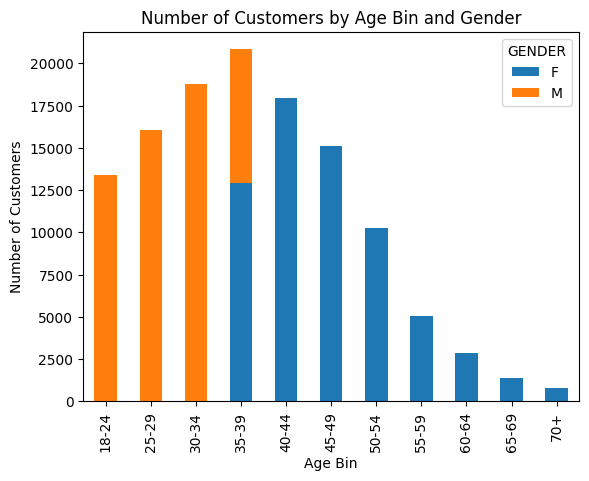

<Figure size 1000x600 with 0 Axes>

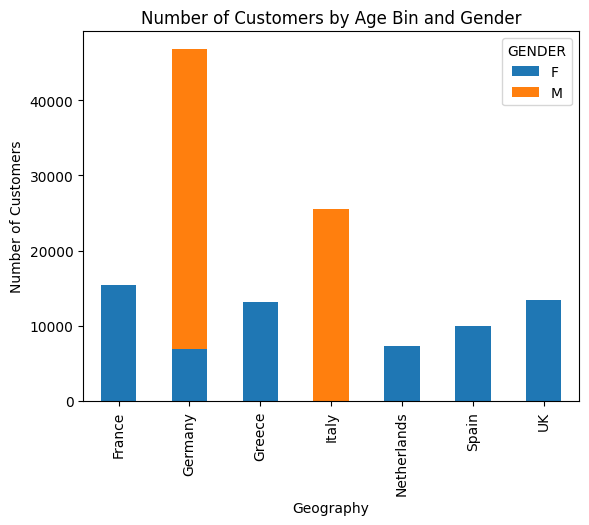

In [ ]:
pivot_table = customers_df.pivot_table(index='AgeBin', columns='GEOGRAPHY', values='Quantity', aggfunc='count')



# Create a bar plot customer by age bin and geography
plt.figure(figsize=(10, 6))
pivot_table.plot.bar(stacked=True)
plt.title('Number of Customers by Age Bin and Geography')
plt.xlabel('Age Bin')
plt.ylabel('Number of Customers')
plt.legend(title='GEOGRAPHY')
plt.show()


pivot_table = customers_df.pivot_table(index='AgeBin', columns='GENDER', values='Quantity', aggfunc='count')

# Create a bar plot customer by age bin and geography
plt.figure(figsize=(10, 6))
pivot_table.plot.bar(stacked=True)
plt.title('Number of Customers by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Number of Customers')
plt.legend(title='GENDER')
plt.show()


pivot_table = customers_df.pivot_table(index='GEOGRAPHY', columns='GENDER', values='Quantity', aggfunc='count')

# Create a bar plot customer by age bin and geography
plt.figure(figsize=(10, 6))
pivot_table.plot.bar(stacked=True)
plt.title('Number of Customers by Age Bin and Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='GENDER')
plt.show()

In [ ]:
#RFM segmentation
last_purchase_date = customers_df['Date'].max()
customers_df['Total_revenue'] = customers_df['Sales_Amount']*customers_df['Quantity']
#calculating Recency


customers_df['recency'] = customers_df['Date'].apply(lambda x : (last_purchase_date - x).days)

#calculating Frequency

customers_df['frequency'] = customers_df.groupby('Customer_ID')['Transaction_ID'].transform('nunique')

# calculate Monetary

customers_df['monetary'] = customers_df.groupby('Customer_ID')['Total_revenue'].transform('sum')

customers_df

,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,AgeBin,Total_revenue,recency,frequency,monetary
0,2547,F,48,Spain,1,2021-01-02,1,X52,0EM7L,1.0,3.13,45-49,3.13,363,7,155.12
1,2547,F,48,Spain,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69,45-49,12.69,361,7,155.12
2,2547,F,48,Spain,7800,2021-01-25,3743,X52,885U7,1.0,4.95,45-49,4.95,340,7,155.12
3,2547,F,48,Spain,7801,2021-01-25,3743,29A,A59HR,3.0,6.24,45-49,18.72,340,7,155.12
4,2547,F,48,Spain,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75,45-49,11.75,312,7,155.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,5751,M,34,Germany,131653,2021-07-04,32874,LSD,NSGRM,1.0,11.02,30-34,11.02,180,1,59.59
131702,5751,M,34,Germany,131654,2021-07-04,32874,0H2,9Q5PZ,1.0,7.85,30-34,7.85,180,1,59.59
131703,5751,M,34,Germany,131655,2021-07-04,32874,D6J,52BYA,1.0,40.72,30-34,40.72,180,1,59.59
131704,10765,M,29,Germany,131666,2021-07-04,32881,Z4O,6IISH,1.0,1.19,25-29,1.19,180,1,1.19


In [ ]:
#ordering column
new_order = ['Customer_ID', 'GENDER', 'AGE', 'GEOGRAPHY','id','Date','Transaction_ID','SKU_Category','SKU','Quantity','Sales_Amount','Total_revenue','AgeBin','recency','frequency','monetary']

cust_df = customers_df[new_order]

cust_df

,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Total_revenue,AgeBin,recency,frequency,monetary
0,2547,F,48,Spain,1,2021-01-02,1,X52,0EM7L,1.0,3.13,3.13,45-49,363,7,155.12
1,2547,F,48,Spain,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69,12.69,45-49,361,7,155.12
2,2547,F,48,Spain,7800,2021-01-25,3743,X52,885U7,1.0,4.95,4.95,45-49,340,7,155.12
3,2547,F,48,Spain,7801,2021-01-25,3743,29A,A59HR,3.0,6.24,18.72,45-49,340,7,155.12
4,2547,F,48,Spain,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75,11.75,45-49,312,7,155.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,5751,M,34,Germany,131653,2021-07-04,32874,LSD,NSGRM,1.0,11.02,11.02,30-34,180,1,59.59
131702,5751,M,34,Germany,131654,2021-07-04,32874,0H2,9Q5PZ,1.0,7.85,7.85,30-34,180,1,59.59
131703,5751,M,34,Germany,131655,2021-07-04,32874,D6J,52BYA,1.0,40.72,40.72,30-34,180,1,59.59
131704,10765,M,29,Germany,131666,2021-07-04,32881,Z4O,6IISH,1.0,1.19,1.19,25-29,180,1,1.19


In [ ]:
#normalisation of RFM

cust_df['R_rank'] = cust_df['recency'].rank(ascending=False)
cust_df['F_rank'] = cust_df['frequency'].rank(ascending=True)
cust_df['M_rank'] = cust_df['monetary'].rank(ascending=True)

# normalizing the rank of the customers
cust_df['R_rank_norm'] = (cust_df['R_rank']/cust_df['R_rank'].max())*100
cust_df['F_rank_norm'] = (cust_df['F_rank']/cust_df['F_rank'].max())*100
cust_df['M_rank_norm'] = (cust_df['F_rank']/cust_df['M_rank'].max())*100

cust_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

cust_df.head()



<ipython-input-27-b02bec4dc88c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['R_rank'] = cust_df['recency'].rank(ascending=False)
<ipython-input-27-b02bec4dc88c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['F_rank'] = cust_df['frequency'].rank(ascending=True)
<ipython-input-27-b02bec4dc88c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,Customer_ID,GENDER,AGE,GEOGRAPHY,id,Date,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Total_revenue,AgeBin,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,2547,F,48,Spain,1,2021-01-02,1,X52,0EM7L,1.0,3.13,3.13,45-49,363,7,155.12,0.092697,60.00152,59.981008
1,2547,F,48,Spain,639,2021-01-04,332,Q4N,MM3E0,1.0,12.69,12.69,45-49,361,7,155.12,0.413336,60.00152,59.981008
2,2547,F,48,Spain,7800,2021-01-25,3743,X52,885U7,1.0,4.95,4.95,45-49,340,7,155.12,6.036304,60.00152,59.981008
3,2547,F,48,Spain,7801,2021-01-25,3743,29A,A59HR,3.0,6.24,18.72,45-49,340,7,155.12,6.036304,60.00152,59.981008
4,2547,F,48,Spain,17633,2021-02-22,8477,L9F,7W8WS,1.0,11.75,11.75,45-49,312,7,155.12,13.490791,60.00152,59.981008


In [ ]:
#calculating RFM score

cust_df['RFM_Score'] = 0.15*cust_df['R_rank_norm']+0.28 * \
	cust_df['F_rank_norm']+0.57*cust_df['M_rank_norm']
cust_df['RFM_Score'] *= 0.05
cust_df = cust_df.round(2)


cust_df["Customer_segment"] = np.where(cust_df['RFM_Score'] >
									4.5, "Top Customers",
									(np.where(
										cust_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	cust_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(cust_df['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
cust_df[['Customer_ID','GENDER' , 'GEOGRAPHY' , 'AgeBin' ,'RFM_Score', 'Customer_segment']].head()



,Customer_ID,GENDER,GEOGRAPHY,AgeBin,RFM_Score,Customer_segment
0,2547,F,Spain,45-49,2.55,Low Value Customers
1,2547,F,Spain,45-49,2.55,Low Value Customers
2,2547,F,Spain,45-49,2.59,Low Value Customers
3,2547,F,Spain,45-49,2.59,Low Value Customers
4,2547,F,Spain,45-49,2.65,Low Value Customers


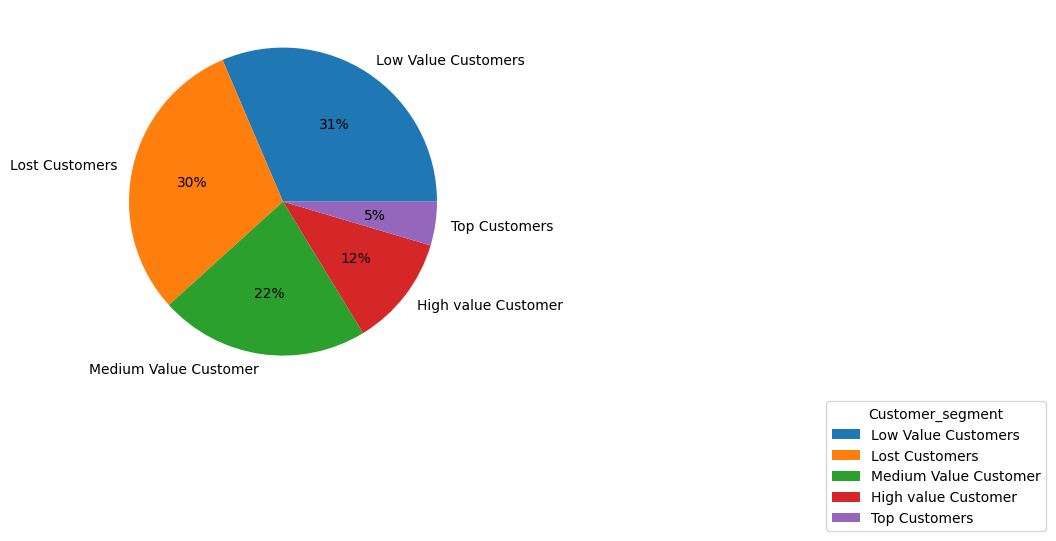

In [ ]:
#visualizing

plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(cust_df.Customer_segment.value_counts(),
		labels=cust_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.legend(loc="best", bbox_to_anchor=(2.5,0), title="Customer_segment")
plt.show()
